In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = "/content/gdrive/My Drive/Datasets/train.csv"
data = pd.read_csv(train)

In [ ]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [ ]:
# Normalize starter features
min_max_scaler = preprocessing.MinMaxScaler()
startersScaled = min_max_scaler.fit_transform(starterFeatures)
subset = pd.DataFrame(startersScaled)
print(subset.head())


          0         1         2         3
0  0.371055  0.613722  0.460930  0.549934
1  0.613812  0.843916  0.507860  0.599319
2  0.429319  0.693091  0.476690  0.554652
3  0.463555  0.846391  0.535086  0.616602
4  0.349795  0.848878  0.527060  0.629240


In [ ]:
# Determine est for number of clusters in data
numClusters = [1,2,3,4,5,6,7,8]
sse = []
for k in numClusters:
    test_Kmeans = cluster.KMeans(n_clusters=k)
    test_Kmeans.fit(subset)
    sse.append(test_Kmeans.inertia_)

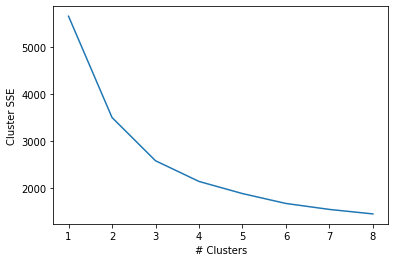

In [ ]:
# Plot elbow plt
plt.plot(numClusters,sse)
plt.xlabel("# Clusters")
plt.ylabel("Cluster SSE")
plt.show()

In [ ]:
# kmeans cluster
kmeans = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
kmeans.fit(subset)
labels = kmeans.labels_
post_clusterDF = pd.DataFrame(labels, index=subset.index, columns=['Cluster ID'])
print(post_clusterDF)


        Cluster ID
0                0
1                1
2                2
3                1
4                2
...            ...
258724           2
258725           1
258726           1
258727           0
258728           1

[258729 rows x 1 columns]


In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=subset.columns)

,0,1,2,3
0,0.377695,0.534634,0.435703,0.525002
1,0.493932,0.820690,0.505432,0.611569
2,0.372181,0.776089,0.483777,0.580402


In [ ]:
#subset.plot.scatter(pd)

TypeError: ignored

None
